In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [94]:
data = pd.read_csv("air_pollution.csv")
data.head()

,date,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
0,2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667
1,2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333
2,2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333
3,2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333
4,2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333


## Explore Data

### Pair Plot

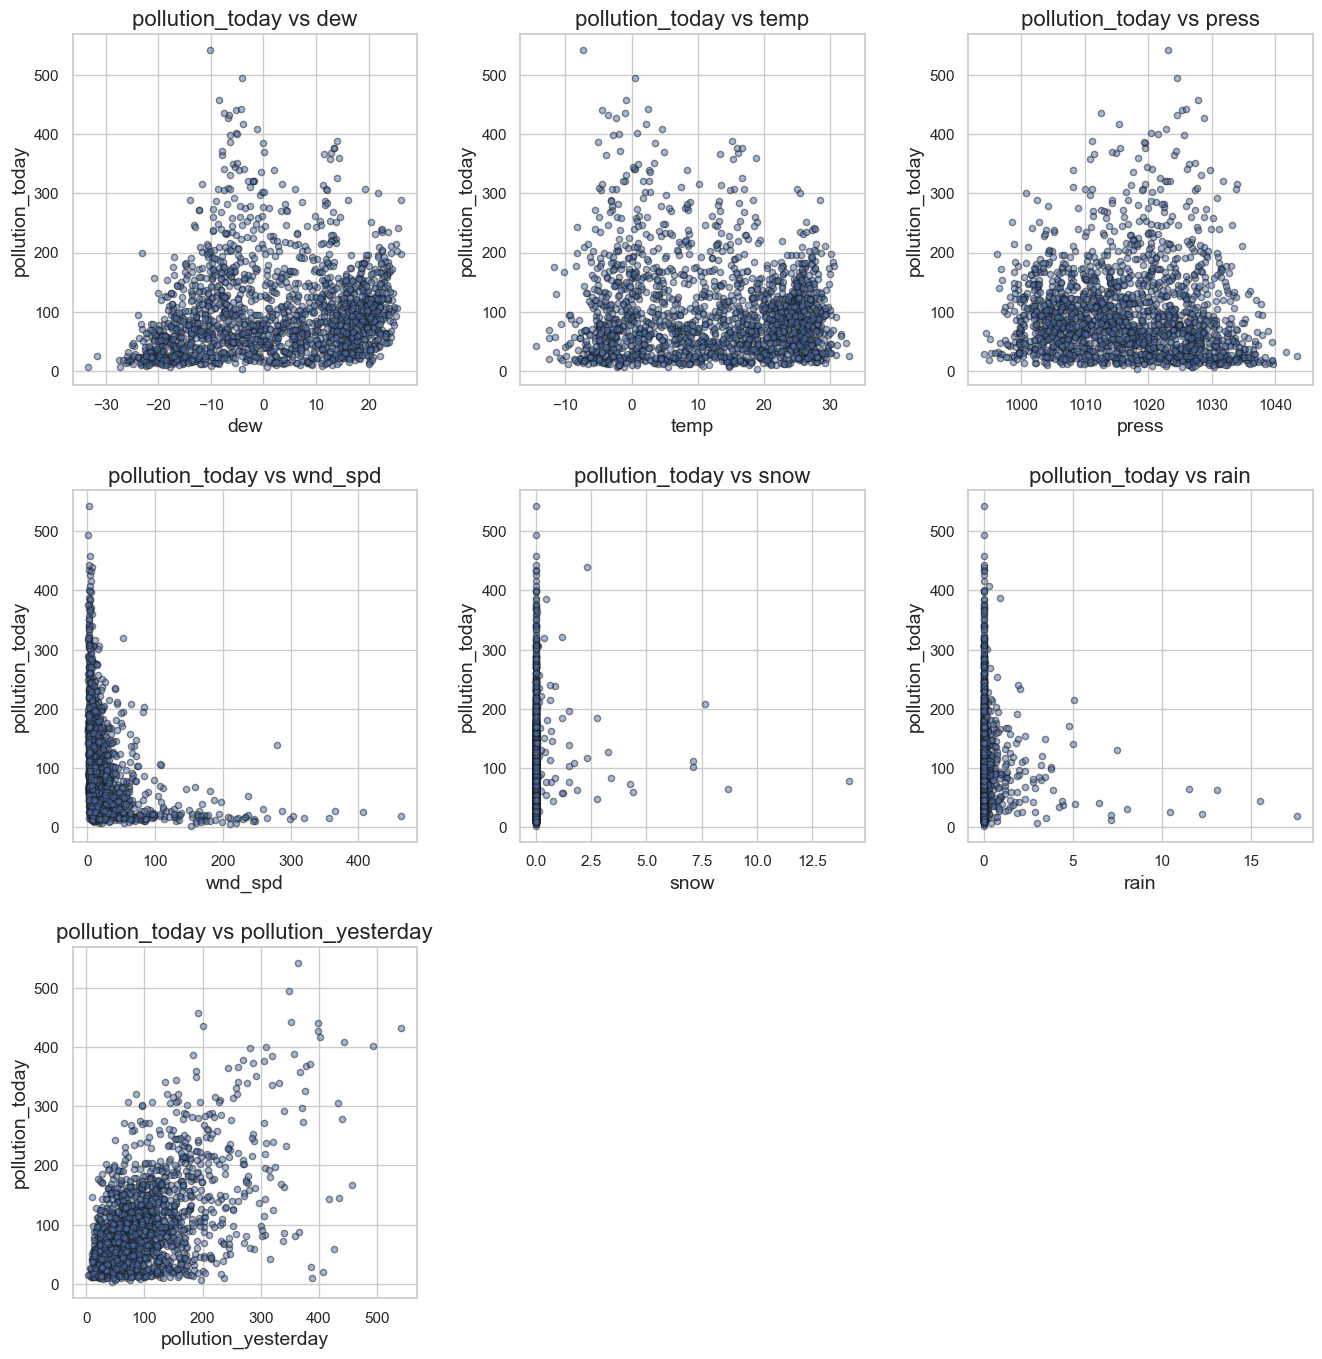

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style and context
sns.set(style="whitegrid", context="notebook")

# Set overall figure size
plt.figure(figsize=(16, 16))

# Define the columns to be included in the pairplot (excluding date and pollution_today)
columns_to_plot = ['dew', 'temp', 'press', 'wnd_spd', 'snow', 'rain', 'pollution_yesterday']

# Create subplots in a 3x3 grid
for index, column in enumerate(columns_to_plot, start=1):
    if index == 9:
        break
    plt.subplot(3, 3, index)
    plt.scatter(data[column], data['pollution_today'], s=20, alpha=0.5, edgecolor="k")
    plt.xlabel(column, fontsize=14)
    plt.ylabel('pollution_today', fontsize=14)
    plt.title(f"pollution_today vs {column}", fontsize=16)

# Adjust plot layout
plt.subplots_adjust(top=0.9, wspace=0.3, hspace=0.3)

plt.savefig('filename.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()




### Correlation Matrix

                     pollution_today       dew      temp     press   wnd_spd  \
pollution_today             1.000000  0.148133 -0.080849 -0.031321 -0.284662   
dew                         0.148133  1.000000  0.906020 -0.801776 -0.334133   
temp                       -0.080849  0.906020  1.000000 -0.865277 -0.217490   
press                      -0.031321 -0.801776 -0.865277  1.000000  0.214193   
wnd_spd                    -0.284662 -0.334133 -0.217490  0.214193  1.000000   
snow                        0.028893 -0.055574 -0.133997  0.101694  0.019842   
rain                       -0.050574  0.176558  0.093423 -0.113859 -0.007890   
pollution_yesterday         0.568445  0.065677 -0.058848  0.015165 -0.114668   

                         snow      rain  pollution_yesterday  
pollution_today      0.028893 -0.050574             0.568445  
dew                 -0.055574  0.176558             0.065677  
temp                -0.133997  0.093423            -0.058848  
press                0.1016

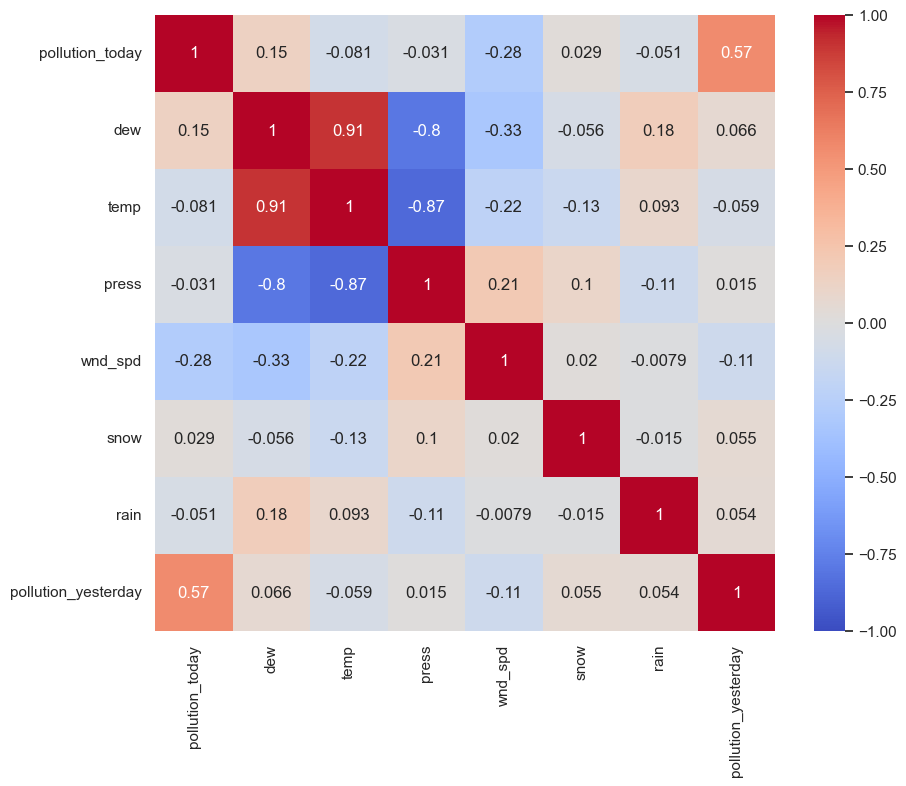

In [96]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.savefig('filename1.png', dpi=300, bbox_inches='tight')

plt.show()


In [81]:
correlations = data.corr()['pollution_today'].sort_values(ascending=False)
print("Strongest correlations with pollution_today concentration:")
print(correlations.head())
print()
print("Weakest correlations with pollution_todayconcentration:")
print(correlations.tail())


Strongest correlations with pollution_today concentration:
pollution_today        1.000000
pollution_yesterday    0.568445
dew                    0.148133
snow                   0.028893
press                 -0.031321
Name: pollution_today, dtype: float64

Weakest correlations with pollution_todayconcentration:
snow       0.028893
press     -0.031321
rain      -0.050574
temp      -0.080849
wnd_spd   -0.284662
Name: pollution_today, dtype: float64


## Feature Engineering and Model Selection

### Feature Scaling

In [82]:
from sklearn.preprocessing import StandardScaler

# Select the columns to scale (excluding date and pollution_today)
columns_to_scale = ['dew', 'temp', 'press', 'wnd_spd', 'snow', 'rain', 'pollution_yesterday']

scaler = StandardScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


### OLS before interaction term

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm

# Define target and feature columns
X = data.drop(columns=['date', 'pollution_today'])
y = data['pollution_today']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term to the features matrix
X_train = sm.add_constant(X_train)

# Fit OLS model on the training data
model = sm.OLS(y_train, X_train).fit()
print(model.summary())
# Make predictions on the testing data
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# Evaluate the model's performance using R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared:", r2)
print("RMSE:", rmse)


                            OLS Regression Results                            
Dep. Variable:        pollution_today   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     239.5
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          8.39e-237
Time:                        00:32:55   Log-Likelihood:                -7830.7
No. Observations:                1460   AIC:                         1.568e+04
Df Residuals:                    1452   BIC:                         1.572e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  98.3828    

## Creating New Features

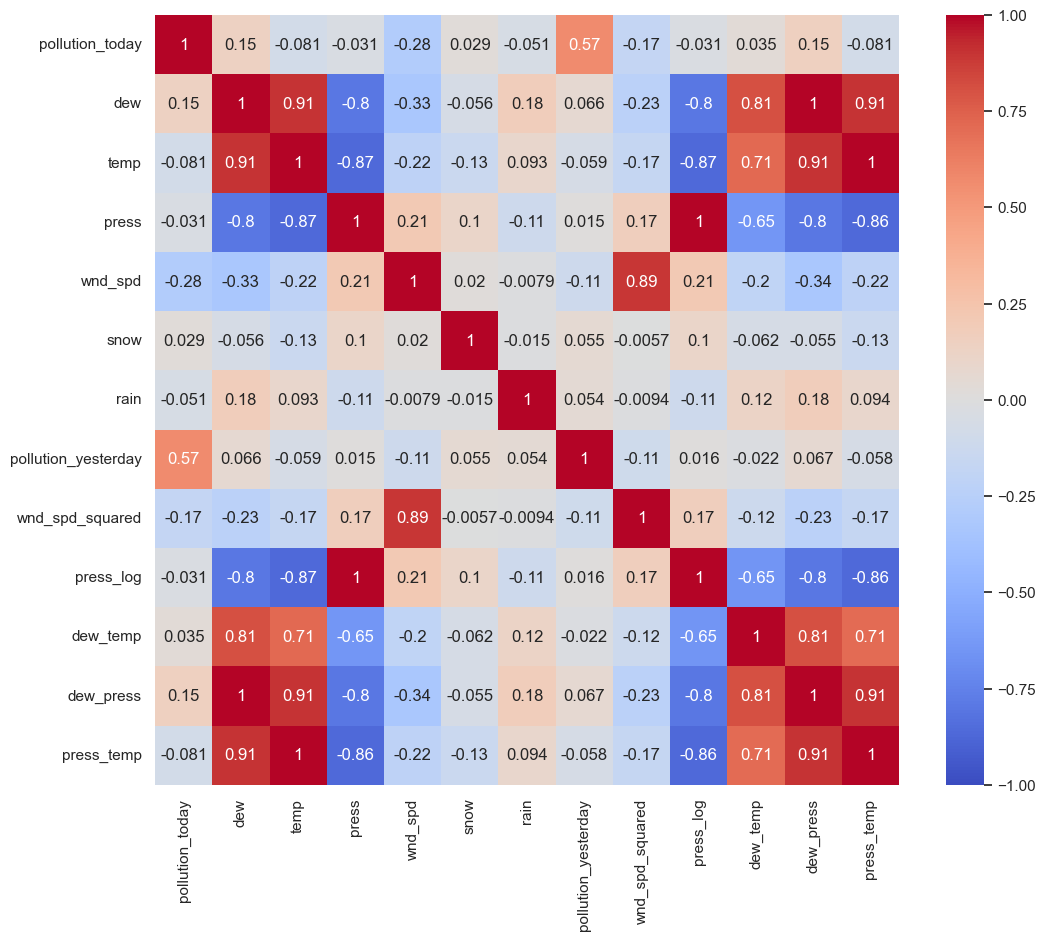

In [102]:
# 1. Apply non-linear transformations
data['wnd_spd_squared'] = data['wnd_spd'] ** 2
data['press_log'] = np.log(data['press'])

# 2. Create interaction terms
data['dew_temp'] = data['dew'] * data['temp']
data['dew_press'] = data['dew'] * data['press']
data['press_temp'] = data['press'] * data['temp']

# Check the new correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

### OLS After Interaction Term

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
data.fillna(data.mean(), inplace=True)
# Define target and feature columns
X = data.drop(columns=['date', 'pollution_today'])
y = data['pollution_today']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term to the features matrix
X_train = sm.add_constant(X_train)

# Fit OLS model on the training data
model = sm.OLS(y_train, X_train).fit()
print(model.summary())
# Make predictions on the testing data
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# Evaluate the model's performance using R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared:", r2)
print("RMSE:", rmse)


                            OLS Regression Results                            
Dep. Variable:        pollution_today   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     161.9
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          3.82e-257
Time:                        05:10:51   Log-Likelihood:                -7769.7
No. Observations:                1460   AIC:                         1.557e+04
Df Residuals:                    1447   BIC:                         1.563e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.091e+06   4

C:\Users\ZYY\AppData\Local\Temp\ipykernel_18336\3412757593.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


### Model Selection

In [104]:
data.head()

,date,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday,wnd_spd_squared,press_log,dew_temp,dew_press,press_temp
0,2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667,618.019600,6.932204,43.562500,-8710.375000,-5251.843750
1,2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333,5032.188021,6.930291,86.484375,-10355.765625,-8736.345486
2,2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333,12356.730867,6.936626,240.062500,-21486.463542,-11836.854167
3,2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333,3239.886400,6.940827,355.434028,-25409.947917,-14944.494792
4,2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333,342.681803,6.940948,297.342014,-24508.489583,-12964.947917


#### Train-test split

In [105]:
from sklearn.model_selection import train_test_split

# Define target and feature columns
X = data.drop(columns=['date', 'pollution_today'])
y = data['pollution_today']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### Cross-validation

In [106]:
# Fill missing values using the mean value of the column
data.fillna(data.mean(), inplace=True)

from sklearn.model_selection import train_test_split

# Define target and feature columns
X = data.drop(columns=['date', 'pollution_today'])
y = data['pollution_today']

# Create a Linear Regression model
model = LinearRegression()
# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores and the mean score
print("Cross-validation scores:", scores)
print("Mean R-squared:", scores.mean())


Cross-validation scores: [0.43531501 0.5791936  0.62853394 0.58068361 0.5525143 ]
Mean R-squared: 0.5552480954858607


C:\Users\ZYY\AppData\Local\Temp\ipykernel_18336\496657823.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


#### Recursive feature elimination and Regulation

In [108]:
from sklearn.feature_selection import RFECV

# Create a Linear Regression model
model = LinearRegression()

# Perform Recursive Feature Elimination with Cross-Validation
selector = RFECV(model, step=1, cv=5, scoring='r2')
selector.fit(X_train, y_train)

# Print the optimal number of features and their names
print("Optimal number of features:", selector.n_features_)
print("Selected features:", X_train.columns[selector.support_])


Optimal number of features: 12
Selected features: Index(['dew', 'temp', 'press', 'wnd_spd', 'snow', 'rain',
       'pollution_yesterday', 'wnd_spd_squared', 'press_log', 'dew_temp',
       'dew_press', 'press_temp'],
      dtype='object')


In [101]:
X_train_optimal = X_train[X_train.columns[selector.support_]]
X_test_optimal = X_test[X_test.columns[selector.support_]]

# Fit the models to the training data with optimal features
linear.fit(X_train_optimal, y_train)
ridge.fit(X_train_optimal, y_train)
lasso.fit(X_train_optimal, y_train)

# Make predictions on the test data with optimal features
linear_pred_optimal = linear.predict(X_test_optimal)
ridge_pred_optimal = ridge.predict(X_test_optimal)
lasso_pred_optimal = lasso.predict(X_test_optimal)

# Calculate the mean squared error for each model with optimal features
linear_mse_optimal = mean_squared_error(y_test, linear_pred_optimal)
ridge_mse_optimal = mean_squared_error(y_test, ridge_pred_optimal)
lasso_mse_optimal = mean_squared_error(y_test, lasso_pred_optimal)

# Calculate the root mean squared error (RMSE) for each model with optimal features
linear_rmse_optimal = np.sqrt(linear_mse_optimal)
ridge_rmse_optimal = np.sqrt(ridge_mse_optimal)
lasso_rmse_optimal = np.sqrt(lasso_mse_optimal)

# Print the RMSE values for the optimal features
print("Linear Regression RMSE (optimal features):", linear_rmse_optimal)
print("Ridge Regression RMSE (optimal features):", ridge_rmse_optimal)
print("Lasso Regression RMSE (optimal features):", lasso_rmse_optimal)

# Print the R-squared and RMSE values for the optimal features
print("\nPerformance with optimal features:")
print("Model\t\tR-squared\tRMSE")
print(f"Linear Regression\t{linear_r2_optimal:.4f}\t\t{linear_rmse_optimal:.4f}")
print(f"Ridge Regression\t{ridge_r2_optimal:.4f}\t\t{ridge_rmse_optimal:.4f}")
print(f"Lasso Regression\t{lasso_r2_optimal:.4f}\t\t{lasso_rmse_optimal:.4f}")



Linear Regression RMSE (optimal features): 55.94084765075177
Ridge Regression RMSE (optimal features): 55.93225686165594
Lasso Regression RMSE (optimal features): 55.94059291094267

Performance with optimal features:
Model		R-squared	RMSE
Linear Regression	0.5412		55.9408
Ridge Regression	0.5407		55.9323
Lasso Regression	0.5396		55.9406
